In [1]:
import pandas as pd

df = pd.read_csv('train.csv')


In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
cols = ['LotFrontage','LotArea','BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea','TotRmsAbvGrd',
        'GarageArea','OpenPorchSF']
df = df[cols+['YrSold','SalePrice']]
df = df.dropna()
train_raw = df[df.YrSold < 2010]
test_raw = df[df.YrSold >= 2010]

# Random Forest

<font color='red'>Assignment:</font> Build a model with **RandomForestRegressor** to predict **SalePrice** with **cols**.

In [4]:
y_train=train_raw['SalePrice'].copy()
X_test= test_raw[cols].copy()
y_test=test_raw['SalePrice'].copy()
X_train = train_raw[cols].copy()

In [5]:
from sklearn.ensemble import RandomForestRegressor

In [6]:
rf = RandomForestRegressor()

In [7]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [8]:
y_test_pred=rf.predict(X_test)

<font color='red'>Assignment:</font> Calculate the train/test scores.

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Random Forest Regression Test R2:", r2_score(y_test,y_test_pred))
print("Random Forest Regression Test MAE:",mean_absolute_error(y_test,y_test_pred))
print("Random Forest Regression Test MSE:",mean_squared_error(y_test,y_test_pred))

Random Forest Regression Test R2: 0.8666792904230356
Random Forest Regression Test MAE: 21700.985921411917
Random Forest Regression Test MSE: 996452343.5602025


In [10]:
y_train_pred=rf.predict(X_train)
print("Random Forest Regression Train R2:", r2_score(y_train,y_train_pred))
print("Random Forest Regression Train MAE:",mean_absolute_error(y_train,y_train_pred))
print("Random Forest Regression Train MSE:",mean_squared_error(y_train,y_train_pred))

Random Forest Regression Train R2: 0.9666983706409467
Random Forest Regression Train MAE: 9039.489226663067
Random Forest Regression Train MSE: 228966331.04267886


<font color='red'>Assignment:</font> Plot the feature importance in a bar chart.

In [12]:
import matplotlib.pyplot as plt

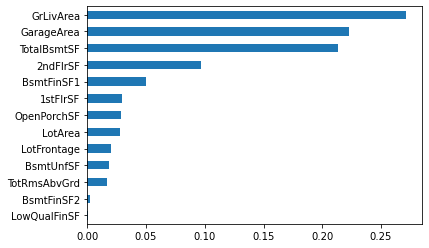

In [31]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

<font color='red'>Question:</font> How does Random Forest work? Why is it better than a single decision tree?

A decision tree is a supervised machine learning algorithm that can be used for both classification and regression problems. A decision tree is simply a series of sequential decisions made to reach a specific result

Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. It is a forest of randomly created decision trees. Each node in the decision tree works on a random subset of features to calculate the output. The random forest then combines the output of individual decision trees to generate the final output.

<font color='red'>Question:</font> Why is Random Forest better than a single decision tree? How does it decrease model error? How does it affect bias and virance?

Random Forest employs a number of techniques to reduce variance in predictions while maintaining (to some extent) the low variance that was characteristic of the lone Decision Tree. It does this primarily by averaging together a number of very weakly correlated (if not completely uncorrelated) trees. Hyperparameters like max_features and min_samples_leaf are among the techniques useful in reducing this correlation between trees, but they often come at the cost of some increase in bias, since each tree now has less data to work with.

<font color='red'>Question:</font> What is Bagging?

While an individual tree is overfit to the training data and is likely to have large error, bagging (Bootstrap Aggregating) uses the insight that a suitably large number of uncorrelated errors average out to zero to solve this problem. Bagging chooses multiple random samples of observations from the training data, with replacement, constructing a tree from each one. Since each tree learns from different data, they are fairly uncorrelated from one another. 

<font color='red'>Bonus Assignment:</font> Tune hyperparameters to optimize model performance. You can choose any 3-4 parameters that you think are most important. What are your best parameters? What are your best train and test scores?

In [42]:
import numpy as np
param_grid= {
    'n_estimators' : np.arange(10,50,10),
    'max_depth' : np.arange(5,11,2),
    'min_samples_split' : np.arange(5,11,2)
}

In [46]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(rf, param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [47]:
best_params

{'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 30}

<font color='red'>Bonus Question:</font> Which are the hyper parameters that affect your model performance? Visualize how they affect your model performance and explain.

# Gradient Boosting Trees

<font color='red'>Assignment:</font> Build a model with **GradientBoostingRegressor** to predict **SalePrice**.

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

In [15]:
gbr = GradientBoostingRegressor()

In [16]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [17]:
y_test_pred=gbr.predict(X_test)
y_train_pred=gbr.predict(X_train)

<font color='red'>Assignment:</font> Calculate the train/test scores.

In [18]:
print("Gradient Boosting Tree Test R2:", r2_score(y_test,y_test_pred))
print("Gradient Boosting Tree Test MAE:",mean_absolute_error(y_test,y_test_pred))
print("Gradient Boosting Tree Test MSE:",mean_squared_error(y_test,y_test_pred))

Gradient Boosting Tree Test R2: 0.842081503165622
Gradient Boosting Tree Test MAE: 22561.82628740587
Gradient Boosting Tree Test MSE: 1180298670.4873435


In [19]:
print("Gradient Boosting Tree Train R2:", r2_score(y_train,y_train_pred))
print("Gradient Boosting Tree Train MAE:",mean_absolute_error(y_train,y_train_pred))
print("Gradient Boosting Tree Train MSE:",mean_squared_error(y_train,y_train_pred))

Gradient Boosting Tree Train R2: 0.9212489838634496
Gradient Boosting Tree Train MAE: 16927.133540780495
Gradient Boosting Tree Train MSE: 541454925.1106462


<font color='red'>Assignment:</font> Plot the feature importance in a bar chart.

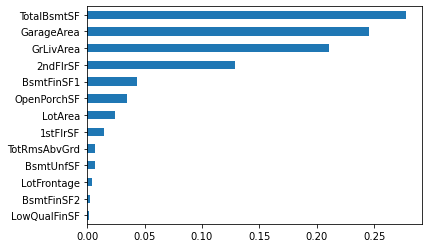

In [28]:
feat_importances = pd.Series(gbr.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

<font color='red'>Question:</font> How does gradient boosting tree work? 

In gradient boosting decision trees, we combine many weak learners to come up with one strong learner. The weak learners here are the individual decision trees. All the trees are conncted in series and each tree tries to minimise the error of the previous tree. Due to this sequential connection, boosting algorithms are usually slow to learn, but also highly accurate. In statistical learning, models that learn slowly perform better.

<font color='red'>Question:</font> What is boosting?

Boosting works on the principle of improving mistakes of the previous learner through the next learner. In boosting, weak learner are used which perform only slightly better than a random chance. Boosting focuses on sequentially adding up these weak learners and filtering out the observations that a learner gets correct at every step. Basically the stress is on developing new weak learners to handle the remaining difficult observations at each step.

<font color='red'>Question:</font> Compare gradient boosting trees and random forest. What are the pros and cons of these two models?

### Gradient Boosting Trees(GBT) : <br>
GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree.<br>

Pros: Since boosted trees are derived by optimizing an objective function, basically GBM can be used to solve almost all objective function that we can write gradient out. This including things like ranking and poission regression, which RF is harder to achieve. <br>

Cons: GBMs are more sensitive to overfitting if the data is noisy.
Training generally takes longer because of the fact that trees are built sequentially.
GBMs are harder to tune than RF. There are typically three parameters: number of trees, depth of trees and learning rate, and each tree built is generally shallow.

### Random Forest: 
RFs train each tree independently, using a random sample of the data. This randomness helps to make the model more robust than a single decision tree, and less likely to overfit on the training data.

Pros: RF is much easier to tune than GBM. There are typically two parameters in RF: number of trees and number of features to be selected at each node.
RF is harder to overfit than GBM.

Cons: The main limitation of the Random Forests algorithm is that a large number of trees may make the algorithm slow for real-time prediction.
For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels. Therefore, the variable importance scores from random forest are not reliable for this type of data. Methods such as partial permutations were used to solve the problem 
If the data contain groups of correlated features of similar relevance for the output, then smaller groups are favored over larger groups 

<font color='red'>Bonus Assignment:</font> Similarly, tune hyperparameters to optimize model performance.

<font color='red'>Bonus Question:</font> Which are the hyper parameters that affect your model performance? Visualize how they affect your model performance and explain.

# XGBoost

<font color='red'>Assignment:</font> Build a model with **XGBRegressor** to predict **SalePrice**. Hint: you may need to install the xgboost package.

In [32]:
#!pip install xgboost

In [33]:
from xgboost import XGBRegressor

In [34]:
xgb = XGBRegressor()

In [35]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [36]:
y_test_pred=xgb.predict(X_test)
y_train_pred=xgb.predict(X_train)

<font color='red'>Assignment:</font> Calculate the train/test scores.

In [37]:
print("XGBoost Test R2:", r2_score(y_test,y_test_pred))
print("XGBoost Test MAE:",mean_absolute_error(y_test,y_test_pred))
print("XGBoost Test MSE:",mean_squared_error(y_test,y_test_pred))

XGBoost Tree Test R2: 0.8109516618633892
XGBoost Tree Test MAE: 23032.67326813811
XGBoost Tree Test MSE: 1412966223.9281688


In [38]:
print("XGBoost Train R2:", r2_score(y_train,y_train_pred))
print("XGBoost Train MAE:",mean_absolute_error(y_train,y_train_pred))
print("XGBoost Train MSE:",mean_squared_error(y_train,y_train_pred))

XGBoost Train R2: 0.9992084470287379
XGBoost Train MAE: 1634.7964873286862
XGBoost Train MSE: 5442345.709325881


<font color='red'>Assignment:</font> Plot the feature importance in a bar chart.

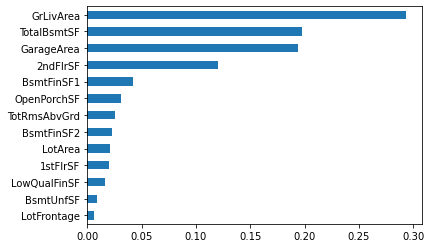

In [39]:
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

<font color='red'>Bonus Assignment:</font> Tune hyperparameters to optimize model performance.

<font color='red'>Bonus Question:</font> Explain what hyper parameters affect your model performance? No visualization is needed.

<font color='red'>Question:</font> What is the relationship and difference between Xgboost and gradient boosting trees? Why does Xgboost perform better than graident boosting trees?

XGBoost is a more regularized form of Gradient Boosting. XGBoost uses advanced regularization (L1 & L2), which improves model generalization capabilities. XGBoost delivers high performance as compared to Gradient Boosting. Its training is very fast and can be parallelized across clusters.